<a href="https://colab.research.google.com/github/venkateshblks/Multi-Linear-Regression/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.**

**R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [5]:
data.corr()

<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data1=data.rename(columns= {'R&D Spend':'RnD','Marketing Spend':'Marketing'})
data1.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


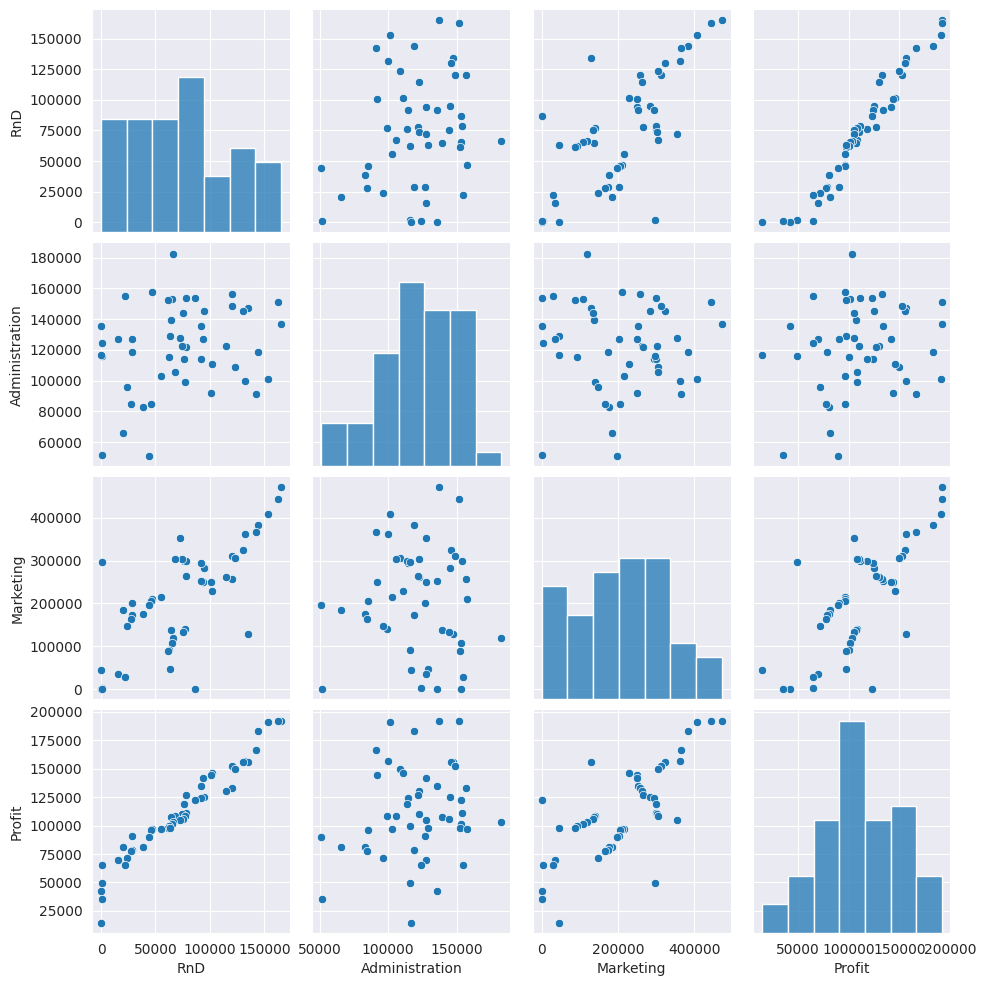

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# preparing a model

In [9]:
data1.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [10]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RnD+Administration+Marketing',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        12:43:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## simple linear regression models

In [11]:
ml_a=smf.ols('Profit~Administration',data = data1).fit()
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.162
Time:                        12:43:48   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ml_m=smf.ols('Profit~Marketing',data = data1).fit()
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.38e-10
Time:                        12:43:48   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
ml_am=smf.ols('Profit~Administration+Marketing',data = data1).fit()
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.50e-10
Time:                        12:43:48   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
data1.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

##Calculating vif


In [15]:
rsq_rnd=smf.ols('RnD~Administration+Marketing',data=data1).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)
print(vif_rnd)
rsq_a=smf.ols('Administration~RnD+Marketing',data=data1).fit().rsquared
vif_a = 1/(1-rsq_a)
print(vif_a)
rsq_m=smf.ols('Marketing~Administration+RnD',data=data1).fit().rsquared
vif_m = 1/(1-rsq_m)
print(vif_m)

2.4689030699947017
1.1750910070550453
2.326773290530878


##subset selection

In [16]:
ad=smf.ols('Profit~RnD+Administration',data=data1).fit()
print(f'AIC:{ad.aic}, rsq:{ad.rsquared},adj_rsq:{ad.rsquared_adj}')

AIC:1059.6636934567293, rsq:0.9478129385009173,adj_rsq:0.9455922124796797


In [17]:
mar=smf.ols('Profit~RnD+Marketing',data=data1).fit()
print(f'AIC:{mar.aic}, rsq:{mar.rsquared},adj_rsq:{mar.rsquared_adj}')

AIC:1057.070772191826, rsq:0.9504503015559763,adj_rsq:0.9483418037498477


## residual analysis

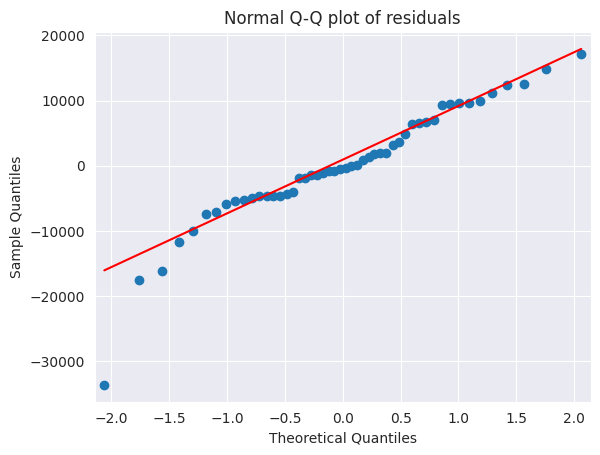

In [18]:
import statsmodels.api as sm

model = smf.ols('Profit~RnD+Marketing',data=data1).fit()
qqplot=sm.qqplot(mar.resid,fit=False,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
import numpy as np
list(np.where(model.resid<-20000))

[array([49])]

In [20]:
mar.resid.tail()

45    17096.506020
46    -7419.050859
47    -4416.134221
48   -11734.242602
49   -33645.494462
dtype: float64

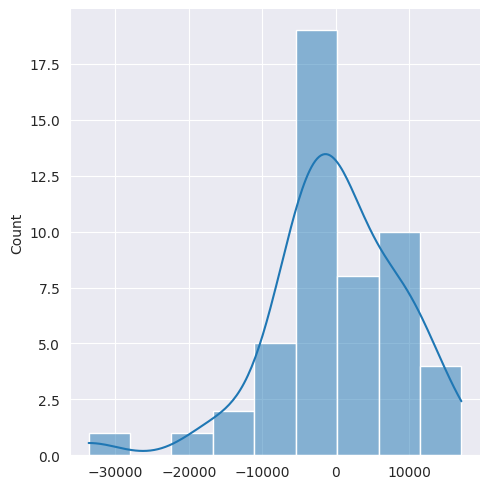

In [21]:
sns.displot(mar.resid, kde = True)

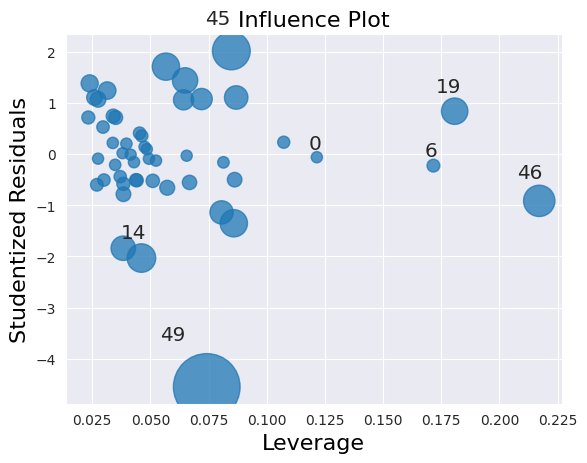

In [22]:
k=sm.graphics.influence_plot(model)


In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

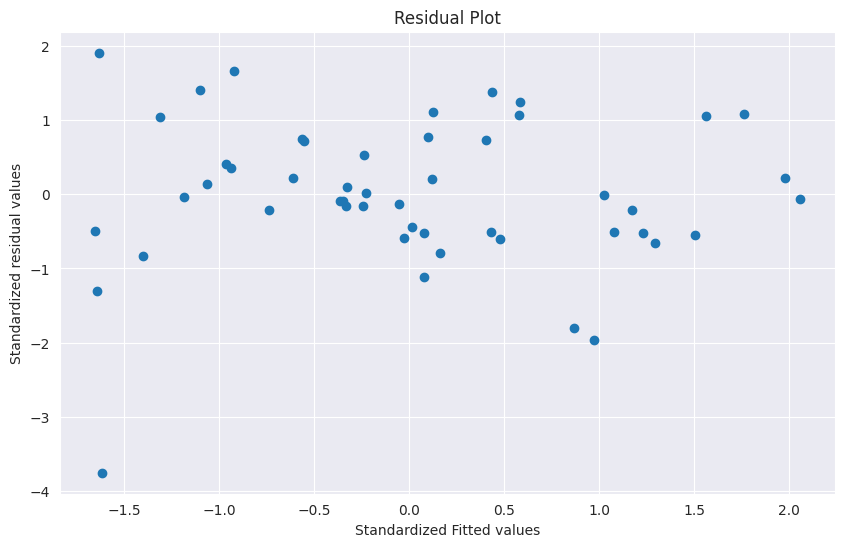

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values(mar.fittedvalues),
            get_standardized_values(mar.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

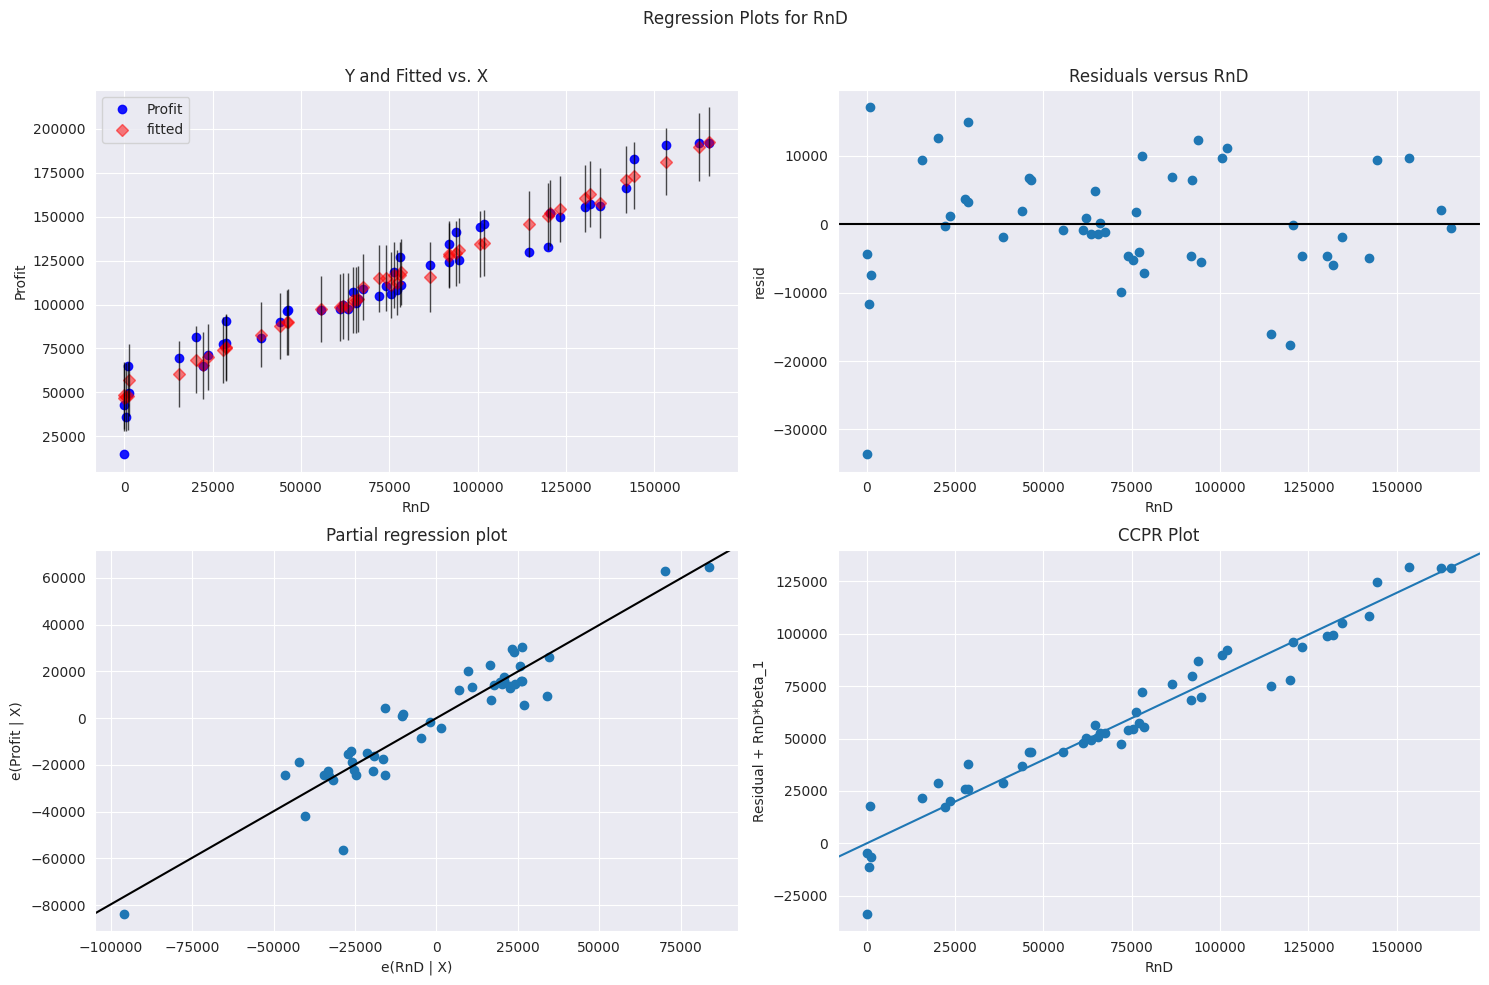

In [25]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mar, "RnD", fig=fig)

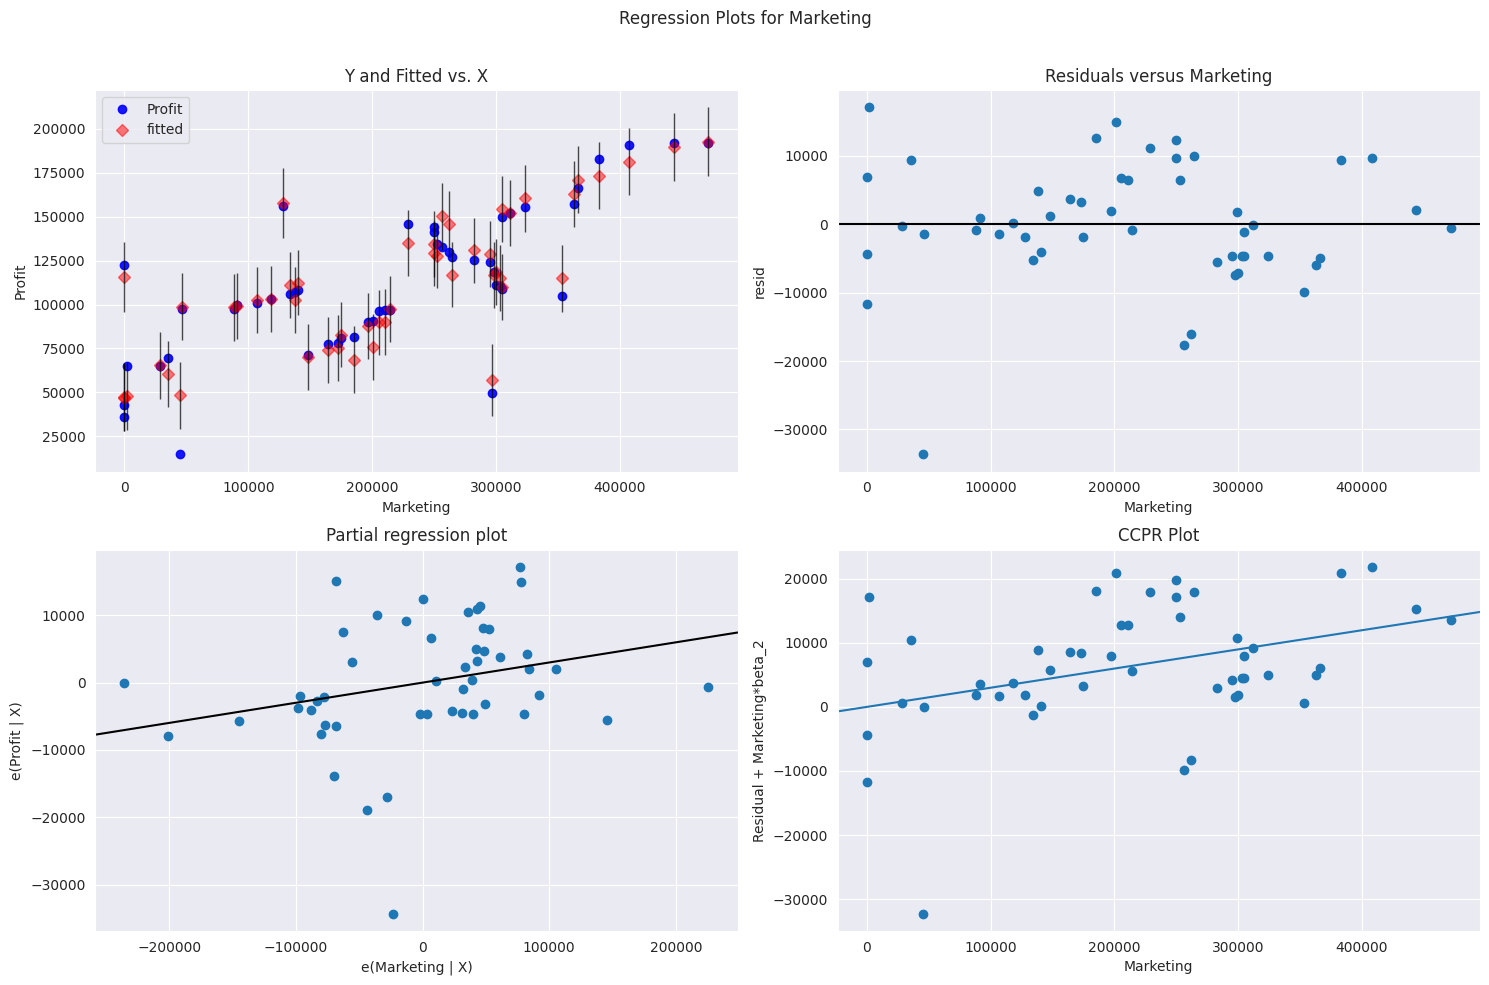

In [26]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mar, "Marketing", fig=fig)

## Model Deletion Diagnostics

In [27]:
#cooks distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = mar.get_influence()
(c, _) = model_influence.cooks_distance
c

array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
       7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
       2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
       1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
       1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
       5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
       2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
       4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
       7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
       5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
       2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
       2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
       5.61942095e-02, 3.89488623e-01])

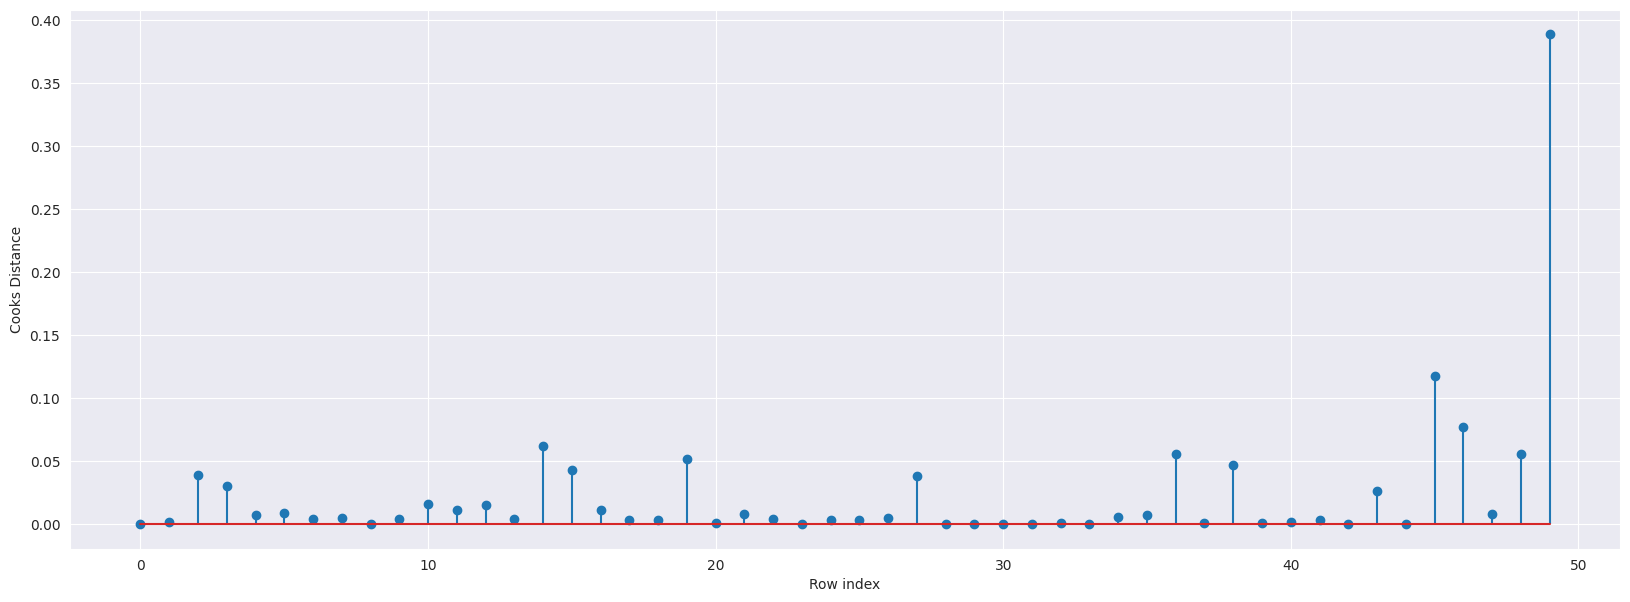

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.36

In [30]:
np.argmax(c),np.max(c)

(49, 0.3894886227924922)

In [31]:
data1[data1.index.isin([49])]

,RnD,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [32]:
data1.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1.drop(data1.index[49],axis=0).reset_index()
data2=data2.drop(['index'],axis=1)
data2.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
data2.shape

(49, 5)

In [35]:
data1.shape

(50, 5)

In [36]:
final_ml=smf.ols('Profit~RnD+Marketing',data=data2).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           3.74e-33
Time:                        12:44:07   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
(cooks,_)=final_ml.get_influence().cooks_distance
cooks

array([1.59025117e-03, 1.09632199e-02, 7.39488185e-02, 5.45173288e-02,
       6.46821561e-03, 9.21839288e-03, 3.37428439e-03, 5.03918247e-03,
       4.25141144e-05, 4.41111834e-03, 2.29818948e-02, 1.49986401e-02,
       2.09655214e-02, 5.41272074e-03, 8.50546124e-02, 5.88432136e-02,
       1.39424824e-02, 4.98551532e-03, 4.07113636e-03, 5.46646226e-02,
       4.54732170e-04, 1.31598004e-02, 7.20929661e-03, 1.04877175e-03,
       5.33967837e-03, 2.50589301e-03, 8.98460004e-03, 5.80099218e-02,
       2.20178715e-04, 1.82336750e-03, 5.43920737e-05, 1.43621749e-03,
       4.31802813e-03, 6.31977506e-04, 5.86226058e-03, 6.20774248e-03,
       6.52859226e-02, 7.35239813e-05, 5.02124210e-02, 2.71247297e-03,
       6.11401560e-04, 1.04702215e-03, 1.46125773e-04, 2.18090122e-02,
       2.97731679e-03, 1.27357607e-01, 1.83375565e-01, 3.31115992e-02,
       1.33227413e-01])

<StemContainer object of 3 artists>

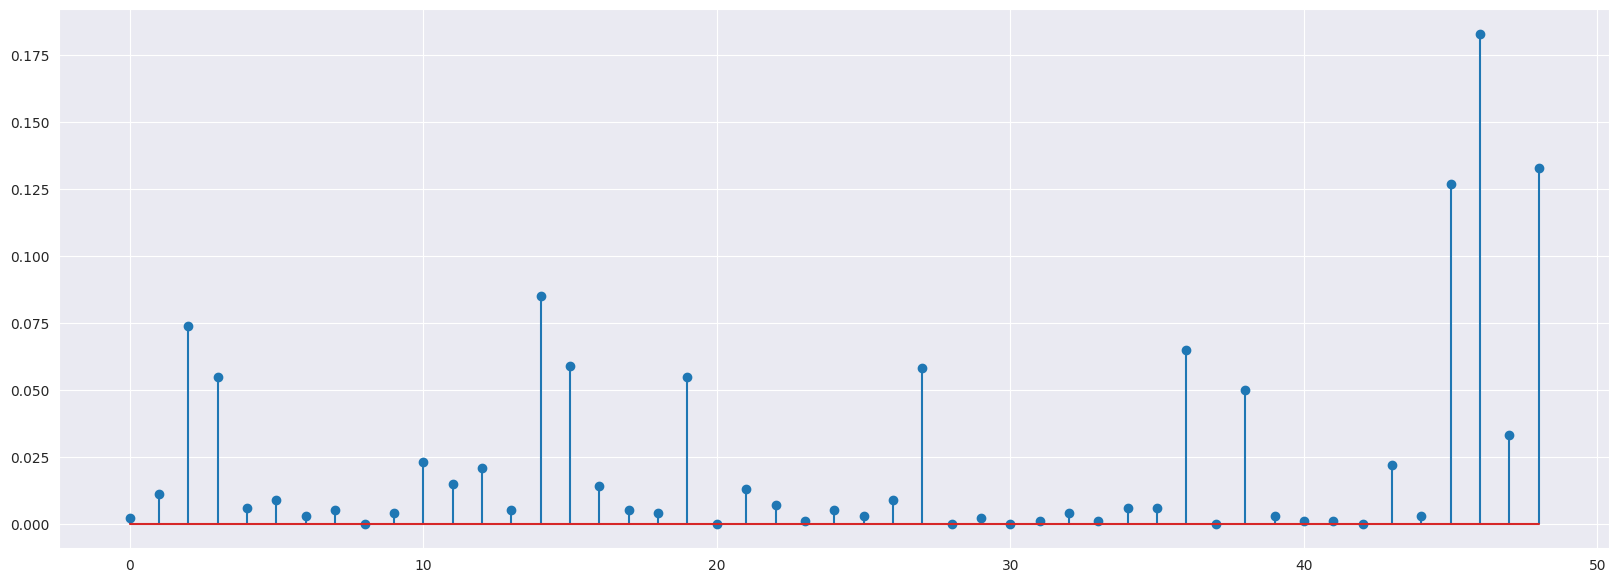

In [38]:
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(cooks,3))

In [39]:
(np.argmax(cooks),np.max(cooks))

(46, 0.18337556491338694)

In [40]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36734693877551017

In [41]:
final_ml.predict(data2).head()

0    190942.726927
1    188043.924520
2    179957.312472
3    172246.416164
4    170022.687457
dtype: float64

In [42]:
data2['predicted Profit']=final_ml.fittedvalues

In [43]:
data2.head()

,RnD,Administration,Marketing,State,Profit,predicted Profit
0,165349.20,136897.80,471784.10,New York,192261.83,190942.726927
1,162597.70,151377.59,443898.53,California,191792.06,188043.924520
2,153441.51,101145.55,407934.54,Florida,191050.39,179957.312472
3,144372.41,118671.85,383199.62,New York,182901.99,172246.416164
4,142107.34,91391.77,366168.42,Florida,166187.94,170022.687457


In [44]:
models_data={'Models':['model','model without Marketing','model without Administration','final model'],'rsquared':[model.rsquared,ad.rsquared,mar.rsquared,final_ml.rsquared],
             'adj_rsuared':[model.rsquared_adj,ad.rsquared_adj,mar.rsquared_adj,final_ml.rsquared_adj],
             'Aic':[model.aic,ad.aic,mar.aic,final_ml.aic],
             'Bic':[model.bic,ad.bic,mar.bic,final_ml.bic]
             }

In [45]:
pd.DataFrame(models_data)

,Models,rsquared,adj_rsuared,Aic,Bic
0,model,0.950450,0.948342,1057.070772,1062.806841
1,model without Marketing,0.947813,0.945592,1059.663693,1065.399762
2,model without Administration,0.950450,0.948342,1057.070772,1062.806841
3,final model,0.961086,0.959394,1018.856480,1024.531941
